# Hands-on Exercise for CLUS Module


In [289]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn import datasets

# importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_samples

In [290]:
#Generating Datasets: 

n_samples = 1500
random_state = 10

Blobs1_X, Blobs1_y = datasets.make_blobs(n_samples=n_samples,
                             random_state=random_state)
Blobs2_X, Blobs2_y = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[2.5, 2.5, 2.5],
                             random_state=random_state)
Moons1_X, Moons1_y = datasets.make_moons(n_samples=n_samples, noise=0.05,
                             random_state=random_state)
Moons2_X, Moons2_y = datasets.make_moons(n_samples=n_samples, noise=0.1,
                             random_state=random_state)
Circles1_X, Circles1_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05, random_state=random_state)
Circles2_X, Circles2_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=0.1, random_state=random_state)
Rand_X = np.random.rand(n_samples, 2);

### 1. K-Means clustering

a. Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to work well. Support your answer by explaining your rationale.

#### Answer a. 

K-Means is expected to work well with Blob1_X and Blob2_X datasets.

Reason : Since K Means is based on computing centroids and clustering based on points nearest to selected centroids,
and Blob1 and Blob2 datasets have distinct centroids in their clusters, thus they are good candidates for kmeans.

b. Without running K-Means clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where k-Means is expected to NOT work well. Support your answer by explaining your rationale.

#### Answer b. 

KMeans won't work well with Moon and Circle datasets.

Reason : There is no best set of 'centroids' that can segregate the intended clusters cleanly. The
structure of Moon and Circle datasets will not allow any single point (centroid) to cleanly segregate clusters
present in the data

c. Run K-Means algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of K-means performance. Describe your rationale for your ranking.

#### Answer c. 
According to plots below , the ranking is :

Blobs1 > Blobs2 > Moons2 > Moons1 > Circle2 > Circle1

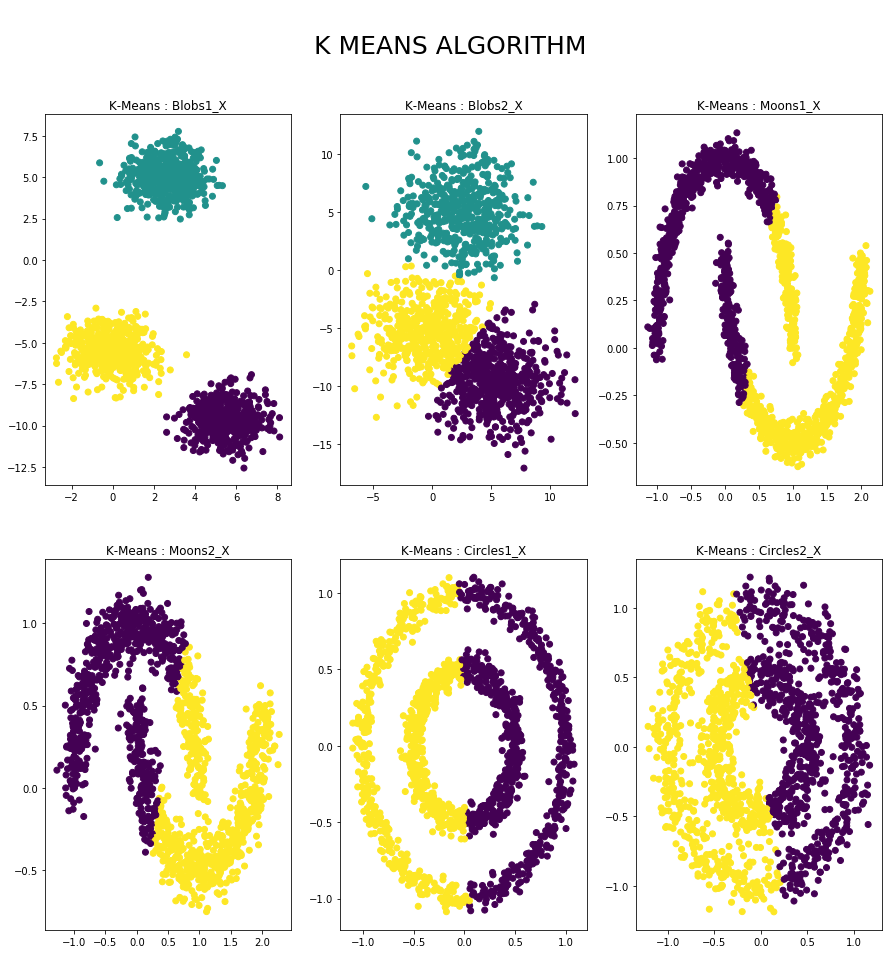

In [308]:
f, axs = plt.subplots(2,3,figsize=(15,15))
f.suptitle('\nK MEANS ALGORITHM',fontsize=25)
ds_pred = {}


cluster_algo = KMeans(n_clusters= 3, random_state=random_state)
data = Blobs1_X
data_name = 'Blobs1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,0].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,0].title.set_text('K-Means : '+data_name)

cluster_algo = KMeans(n_clusters= 3, random_state=random_state)
data = Blobs2_X
data_name = 'Blobs2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,1].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,1].title.set_text('K-Means : '+data_name)


cluster_algo = KMeans(n_clusters= 2, random_state=random_state)
data = Moons1_X
data_name = 'Moons1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,2].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,2].title.set_text('K-Means : '+data_name)


cluster_algo = KMeans(n_clusters= 2, random_state=random_state)
data = Moons2_X
data_name = 'Moons2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,0].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[1,0].title.set_text('K-Means : '+data_name)


cluster_algo = KMeans(n_clusters= 2, random_state=random_state)
data = Circles1_X
data_name = 'Circles1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,1].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[1,1].title.set_text('K-Means : '+data_name)


cluster_algo = KMeans(n_clusters= 2, random_state=random_state)
data = Circles2_X
data_name = 'Circles2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,2].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[1,2].title.set_text('K-Means : '+data_name)

d. For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using K-means. Rank the datasets in decreasing order of Rand-Index scores.

In [311]:
#Rand Index function

from scipy.special import comb
def rand_index(S, T):

    Spairs = comb(np.bincount(S), 2).sum()
    Tpairs = comb(np.bincount(T), 2).sum()
    
    A = np.c_[(S, T)]
    
    f_11 = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(S))
    
    f_10 = Spairs - f_11
    f_01 = Tpairs - f_11
    f_00 = comb(len(A), 2) - f_11 - f_10 - f_01
    return (f_00 + f_11) / (f_00 + f_01 + f_10 + f_11)



In [312]:
rand_indexes = {}
rand_indexes['Blobs1_X'] = rand_index(Blobs1_y,ds_pred['Blobs1_X'])
rand_indexes['Blobs2_X'] = rand_index(Blobs2_y,ds_pred['Blobs2_X'])
rand_indexes['Moons1_X'] = rand_index(Moons1_y,ds_pred['Moons1_X'])
rand_indexes['Moons2_X'] = rand_index(Moons2_y,ds_pred['Moons2_X'])
rand_indexes['Circles1_X'] = rand_index(Circles1_y,ds_pred['Circles1_X'])
rand_indexes['Circles2_X'] = rand_index(Circles2_y,ds_pred['Circles2_X'])



print('\n----------------------------------\nRanked Indices : \n----------------------------------\n')
sorted_rand_idx = sorted(rand_indexes.items(), key = lambda x : x[1],reverse=True)
for d,ri in sorted_rand_idx:
      print(f"{d:<15}{ri:10}")


----------------------------------
Ranked Indices : 
----------------------------------

Blobs1_X       0.99911140760507
Blobs2_X       0.9207142539470758
Moons2_X       0.6240836112964199
Moons1_X       0.6201236379808761
Circles2_X     0.4996806760062264
Circles1_X     0.4996744496330887


e. Are the rankings in (c) consistent with your observations in (d)? If not, explain the reason why your rankings were inconsistent.

#### Answer e
Yes, the rankings are exactly same as expected.

### 2. Agglomerative Clustering - Single Link

a. Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

#### Answer a

Datasets Blob1 , Blob2 , Moon1 and Circle 1 are expected to work well with Single link.

Since Single link has 'optimistic' view of distances, thus it joins clusters based on minimum distance between points of two clusters. Thus only the clusters that are fairly distant will perform well with single link

b. Without running Single-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Single-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

#### Answer b

Datasets Moon2 , Circle2 not expected to work well with Single link.

All the datasets that have high spread will eventually get merged , and thus will not be segregated cleanly by
single link. 

c. Run Single-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Single-link agglomerative algorithm performance. Describe your rationale for your ranking.

#### Ans c :
 Based on the plots below , the ranking for clustering is :
 Blobs1_X > Moons1_X > Circles 1 > Moons 2 > Circles 2 > Blobs 2

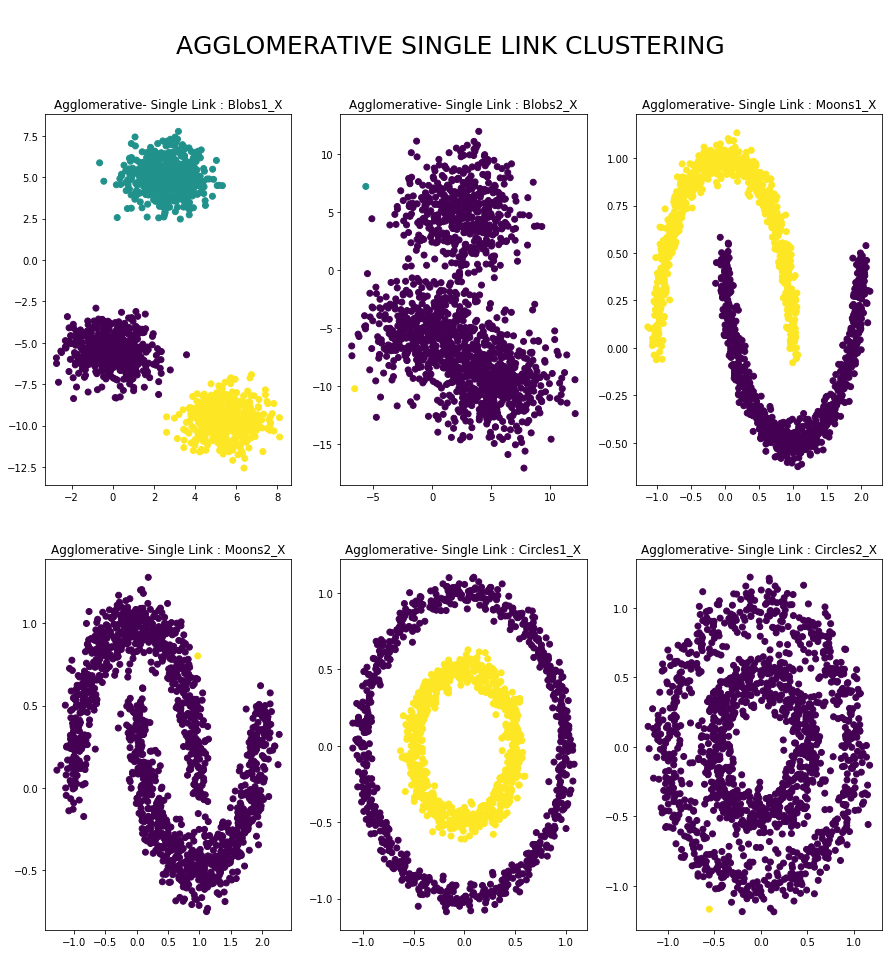

In [294]:
i = 1
f, axs = plt.subplots(2,3,figsize=(15,15))
f.suptitle('\nAGGLOMERATIVE SINGLE LINK CLUSTERING',fontsize=25)
algorithm = 'Agglomerative- Single Link'
ds_pred = {}


cluster_algo = AgglomerativeClustering(linkage="single",n_clusters= 3)
data = Blobs1_X
data_name = 'Blobs1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,0].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,0].title.set_text(algorithm+' : '+data_name)
i+=1

cluster_algo = AgglomerativeClustering(linkage="single",n_clusters= 3)
data = Blobs2_X
data_name = 'Blobs2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,1].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,1].title.set_text(algorithm+' : '+data_name)
i+=1


cluster_algo = AgglomerativeClustering(linkage="single",n_clusters= 2)
data = Moons1_X
data_name = 'Moons1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,2].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,2].title.set_text(algorithm+' : '+data_name)
i+=1


cluster_algo = AgglomerativeClustering(linkage="single",n_clusters= 2)
data = Moons2_X
data_name = 'Moons2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,0].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[1,0].title.set_text(algorithm+' : '+data_name)
i+=1


cluster_algo = AgglomerativeClustering(linkage="single",n_clusters= 2)
data = Circles1_X
data_name = 'Circles1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,1].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[1,1].title.set_text(algorithm+' : '+data_name)
i+=1



cluster_algo = AgglomerativeClustering(linkage="single",n_clusters= 2)
data = Circles2_X
data_name = 'Circles2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,2].scatter(data[:, 0], data[:, 1], c=y_pred)  
axs[1,2].title.set_text(algorithm+' : '+data_name)
i+=1


d. For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Single-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [295]:
rand_indexes = {}
rand_indexes['Blobs1_X'] = rand_index(Blobs1_y,ds_pred['Blobs1_X'])
rand_indexes['Blobs2_X'] = rand_index(Blobs2_y,ds_pred['Blobs2_X'])
rand_indexes['Moons1_X'] = rand_index(Moons1_y,ds_pred['Moons1_X'])
rand_indexes['Moons2_X'] = rand_index(Moons2_y,ds_pred['Moons2_X'])
rand_indexes['Circles1_X'] = rand_index(Circles1_y,ds_pred['Circles1_X'])
rand_indexes['Circles2_X'] = rand_index(Circles2_y,ds_pred['Circles2_X'])



print('\n----------------------------------\nRanked Indices : \n----------------------------------\n')
sorted_rand_idx = sorted(rand_indexes.items(), key = lambda x : x[1],reverse=True)
for d,ri in sorted_rand_idx:
      print(f"{d:<15}{ri:10}")


----------------------------------
Ranked Indices : 
----------------------------------

Moons1_X              1.0
Circles1_X            1.0
Blobs1_X       0.99911140760507
Moons2_X       0.49966733377807426
Circles2_X     0.49966733377807426
Blobs2_X       0.33377896375361354


e. Are the rankings in (c) consistent with your observations in (d)? If not, explain the reason why your rankings were inconsistent.

#### Answer e

The rankings are almost same except for Blobs and Moons. The cleanly separated clusters can at best be ranked arbitrarily by using only visual inspection. 


### 3. Agglomerative Clustering - Max Link

a. Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

#### Ans a  :
 Blobs 1 and Blobs 2 datasets are expected to work well with maxlink.
 
 All other datasets have many points within the intended clusters that are farther than points of other clusters.
 Thus Max Link is expected work well with Blobs datasets only as the clusters seem to be well separated

b. Without running Max-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Max-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

#### Ans b :
Circles and Moon Datasets are not expected to work well.

There are parts of these clusters whose farthest points are more distant than points in portions of other clusters.
Thus Max Link will wrongly group portions of inaccurate clusters.

c. Run Max-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Max-link agglomerative algorithm performance. Describe your rationale for your ranking.

#### Ans c

Expected Ranking is :

Blobs1 > Blob2 > Moon 1 > Moon 2 > Circle 1 > Circle2

Reason : The datasets are ranked according to their separation within the clusters as compared to points of other clusters

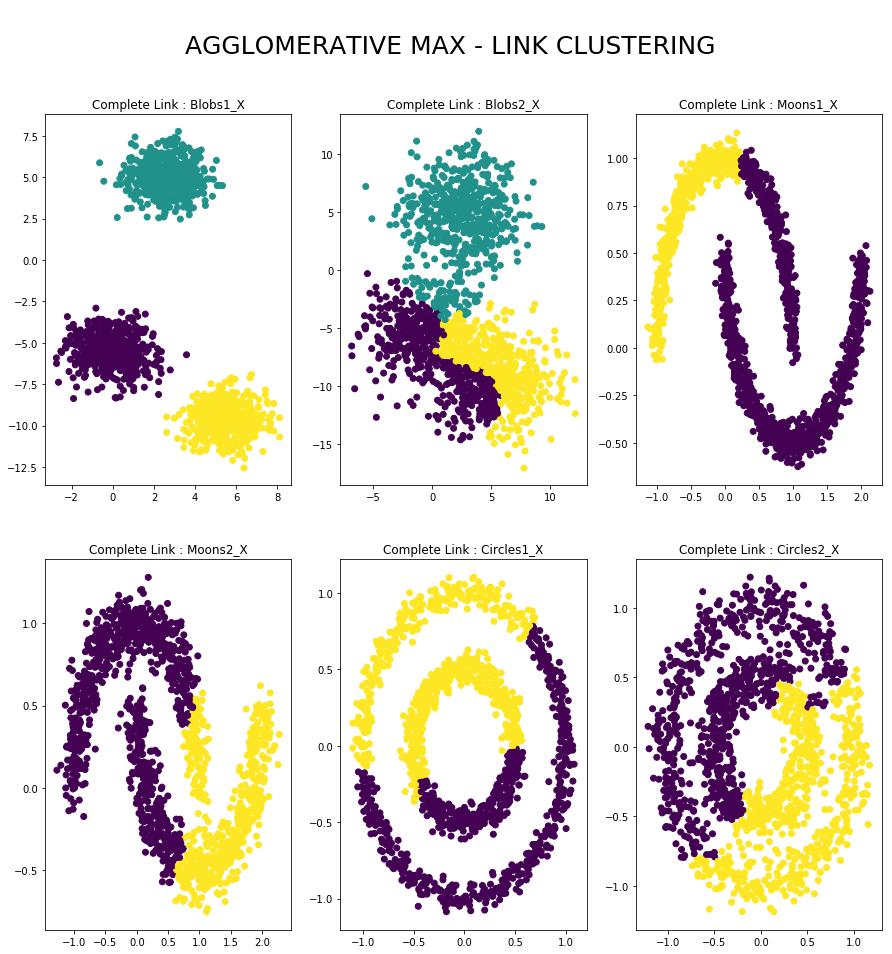

In [314]:
i = 1
f, axs = plt.subplots(2,3,figsize=(15,15))
f.suptitle('\nAGGLOMERATIVE MAX - LINK CLUSTERING',fontsize=25)
algorithm = 'Complete Link'
ds_pred = {}


cluster_algo = AgglomerativeClustering(linkage="complete",n_clusters= 3)
data = Blobs1_X
data_name = 'Blobs1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,0].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,0].title.set_text(algorithm+' : '+data_name)
i+=1

cluster_algo = AgglomerativeClustering(linkage="complete",n_clusters= 3)
data = Blobs2_X
data_name = 'Blobs2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,1].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,1].title.set_text(algorithm+' : '+data_name)
i+=1


cluster_algo = AgglomerativeClustering(linkage="complete",n_clusters= 2)
data = Moons1_X
data_name = 'Moons1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,2].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,2].title.set_text(algorithm+' : '+data_name)
i+=1


cluster_algo = AgglomerativeClustering(linkage="complete",n_clusters= 2)
data = Moons2_X
data_name = 'Moons2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,0].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[1,0].title.set_text(algorithm+' : '+data_name)
i+=1


cluster_algo = AgglomerativeClustering(linkage="complete",n_clusters= 2)
data = Circles1_X
data_name = 'Circles1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,1].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[1,1].title.set_text(algorithm+' : '+data_name)
i+=1



cluster_algo = AgglomerativeClustering(linkage="complete",n_clusters= 2)
data = Circles2_X
data_name = 'Circles2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,2].scatter(data[:, 0], data[:, 1], c=y_pred) 
axs[1,2].title.set_text(algorithm+' : '+data_name)
i+=1


d. For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Max-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [297]:
rand_indexes = {}
rand_indexes['Blobs1_X'] = rand_index(Blobs1_y,ds_pred['Blobs1_X'])
rand_indexes['Blobs2_X'] = rand_index(Blobs2_y,ds_pred['Blobs2_X'])
rand_indexes['Moons1_X'] = rand_index(Moons1_y,ds_pred['Moons1_X'])
rand_indexes['Moons2_X'] = rand_index(Moons2_y,ds_pred['Moons2_X'])
rand_indexes['Circles1_X'] = rand_index(Circles1_y,ds_pred['Circles1_X'])
rand_indexes['Circles2_X'] = rand_index(Circles2_y,ds_pred['Circles2_X'])


print('\n----------------------------------\nRanked Indices : \n----------------------------------\n')
sorted_rand_idx = sorted(rand_indexes.items(), key = lambda x : x[1],reverse=True)
for d,ri in sorted_rand_idx:
      print(f"{d:<15}{ri:10}")


----------------------------------
Ranked Indices : 
----------------------------------

Blobs1_X       0.99911140760507
Blobs2_X       0.7736544362908606
Moons1_X       0.662605292417167
Moons2_X       0.5965310206804536
Circles1_X     0.5218714698688014
Circles2_X     0.5000587058038692


e. Are the rankings in (c) consistent with your observations in (d)? If not, explain the reason why your rankings were inconsistent.

#### Ans e. 
Rankings are exactly as expected

### 4. Agglomerative Clustering - Average Link

a. Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to work well. Support your answer by explaining your rationale.

#### Ans a  :
 Blobs 1 and Blobs 2 datasets are expected to work well with maxlink.
 
 Irrespective of cluster shapes, this algorithm will successfully cluster datasets that have good separation. All other datasets other than Blobs 1 and Blobs 2 have portions that have less inter cluster distance as compared to intra cluster distance

b. Without running Average-link agglomerative clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Average-link agglomerative clustering is expected to NOT work well. Support your answer by explaining your rationale.

#### Ans b.
Moon1,2 and Circle1,2 datasets will not work well with Average Link

As stated , Moon and Circle datasets are not well suited since they have portions that are closer across clusters than within clusters. This will lead to bad clustering

c. Run Average-link agglomerative clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Average-link agglomerative algorithm performance. Describe your rationale for your ranking.

#### Ans c
The expected ranking is :

Blob 1 > Blob 2 > Moon 2 > Moon 1 > Circle 2 > Circle 2

Reason : It's clearly visible from the plots that Blobs will be best performers here followed by 
more 'spread' datasets due to their higher inter cluster average distance as compared to more compact Moon1 and Circle 1 datasets

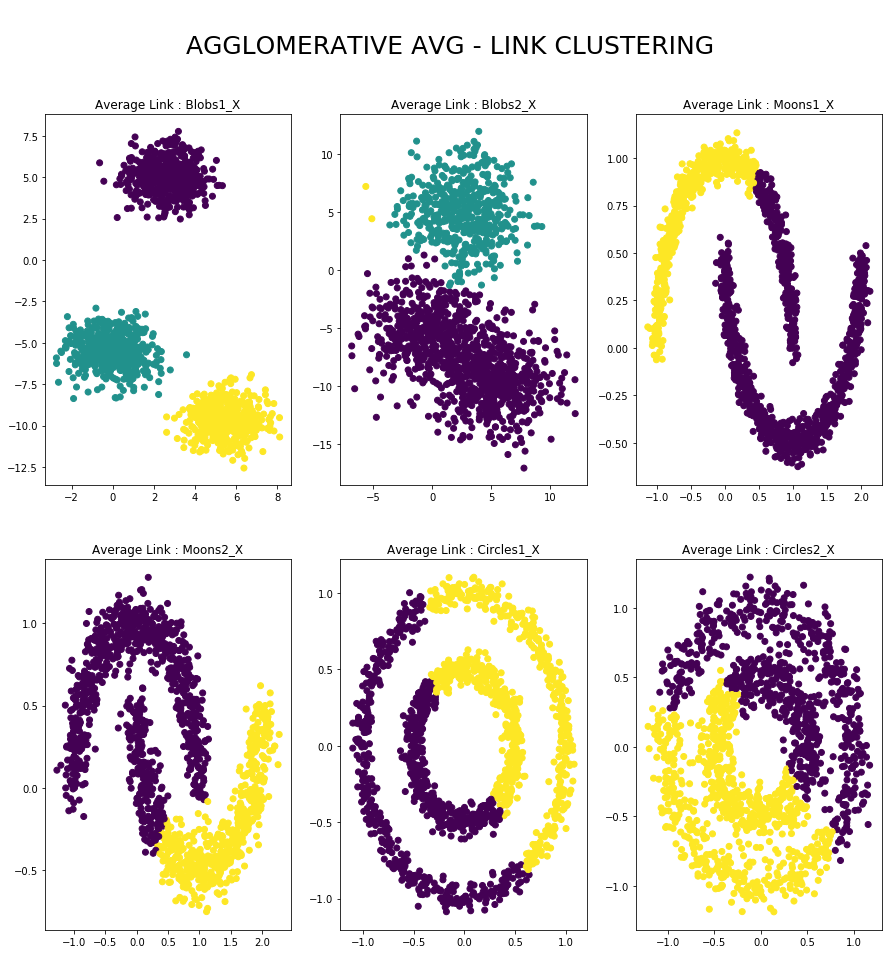

In [298]:
i = 1
f, axs = plt.subplots(2,3,figsize=(15,15))
f.suptitle('\nAGGLOMERATIVE AVG - LINK CLUSTERING',fontsize=25)
algorithm = 'Average Link'
ds_pred = {}


cluster_algo = AgglomerativeClustering(linkage="average",n_clusters= 3)
data = Blobs1_X
data_name = 'Blobs1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,0].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,0].title.set_text(algorithm+' : '+data_name)
i+=1

cluster_algo = AgglomerativeClustering(linkage="average",n_clusters= 3)
data = Blobs2_X
data_name = 'Blobs2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,1].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,1].title.set_text(algorithm+' : '+data_name)
i+=1


cluster_algo = AgglomerativeClustering(linkage="average",n_clusters= 2)
data = Moons1_X
data_name = 'Moons1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,2].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,2].title.set_text(algorithm+' : '+data_name)
i+=1


cluster_algo = AgglomerativeClustering(linkage="average",n_clusters= 2)
data = Moons2_X
data_name = 'Moons2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,0].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[1,0].title.set_text(algorithm+' : '+data_name)
i+=1


cluster_algo = AgglomerativeClustering(linkage="average",n_clusters= 2)
data = Circles1_X
data_name = 'Circles1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,1].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[1,1].title.set_text(algorithm+' : '+data_name)
i+=1



cluster_algo = AgglomerativeClustering(linkage="average",n_clusters= 2)
data = Circles2_X
data_name = 'Circles2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,2].scatter(data[:, 0], data[:, 1], c=y_pred) 
axs[1,2].title.set_text(algorithm+' : '+data_name)
i+=1


d. For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Average-link agglomerative clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [299]:
rand_indexes = {}
rand_indexes['Blobs1_X'] = rand_index(Blobs1_y,ds_pred['Blobs1_X'])
rand_indexes['Blobs2_X'] = rand_index(Blobs2_y,ds_pred['Blobs2_X'])
rand_indexes['Moons1_X'] = rand_index(Moons1_y,ds_pred['Moons1_X'])
rand_indexes['Moons2_X'] = rand_index(Moons2_y,ds_pred['Moons2_X'])
rand_indexes['Circles1_X'] = rand_index(Circles1_y,ds_pred['Circles1_X'])
rand_indexes['Circles2_X'] = rand_index(Circles2_y,ds_pred['Circles2_X'])



print('\n----------------------------------\nRanked Indices : \n----------------------------------\n')
sorted_rand_idx = sorted(rand_indexes.items(), key = lambda x : x[1],reverse=True)
for d,ri in sorted_rand_idx:
      print(f"{d:<15}{ri:10}")


----------------------------------
Ranked Indices : 
----------------------------------

Blobs1_X       0.99911140760507
Blobs2_X       0.7636575494774294
Moons2_X       0.7457647320435846
Moons1_X       0.7132310429175005
Circles2_X     0.5050780520346898
Circles1_X     0.500414498554592


e. Are the rankings in (c) consistent with your observations in (d)? If not, explain the reason why your rankings were inconsistent.

#### Ans 4e.
The rankings are exactly same as expected.

### 5. Density Based Clustering: DBSCAN

a. Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to work well. Support your answer by explaining your rationale.

#### 5.a.

Blob1 , Moon1 and Circle1 datasets are expected to work well with DBSCAN.

Reason : Since DB Scan is based on threshold number of neighbors within a specified distance , thus highly cohesive 
datasets are performed.

b. Without running DBSCAN clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where DBSCAN clustering is expected to NOT work well. Support your answer by explaining your rationale.

#### 5.b.

Blob2 , Moon2 and Circle2 datasets are not expected to work well with DBSCAN.

Reason : Since these datasets have relatively low cohesiveness , thus they will lead to more noise points as less
points will fall within the threshold neighborhood of core points.

c. Run DBSCAN clustering algorithm on all the datasets (except Rand). __Choose eps and min_samples parameters to make sure that DBSCAN finds the same number of clusters as in the ground truth ('Data_y').__ Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of DBSCAN clustering algorithm performance. Describe your rationale for your ranking.

#### 5.c.

Moon1 > Blob1 > Circle1  > Moon2 > Blob2 > Circle2 

Rankings are decided based on high cohesiveness and good separation of intrinsic clusters.


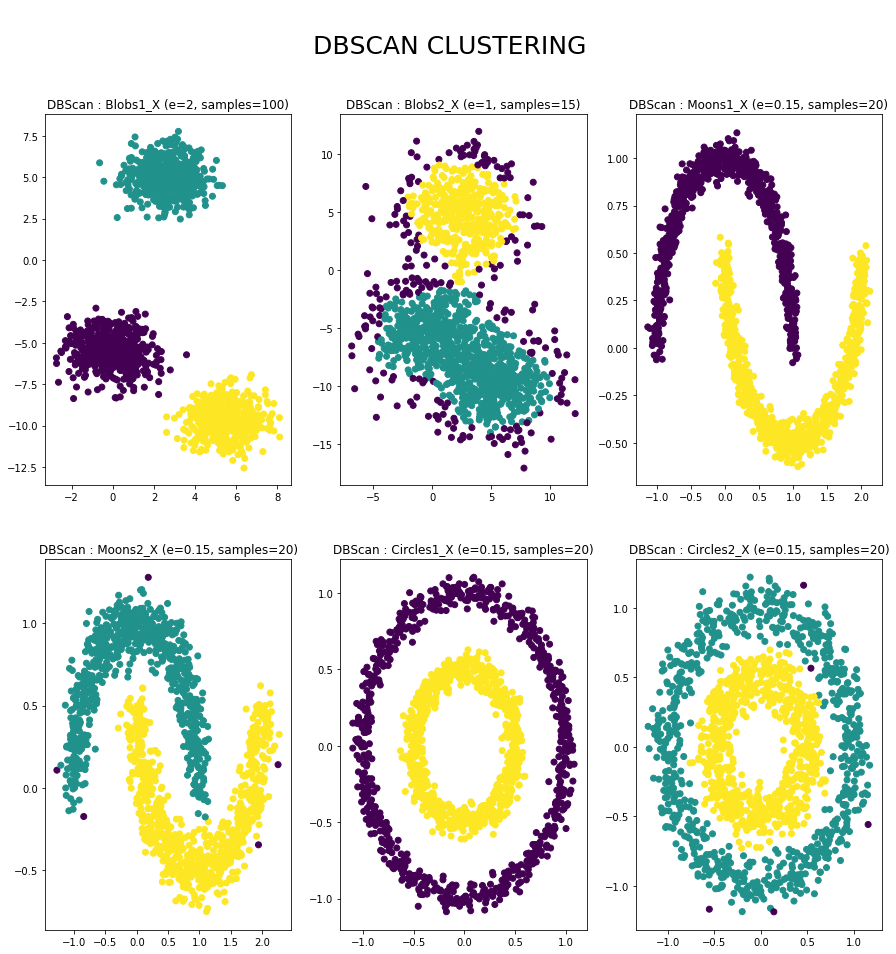

In [315]:
f, axs = plt.subplots(2,3,figsize=(15,15))
f.suptitle('\nDBSCAN CLUSTERING',fontsize=25)
algorithm = 'DBScan'
ds_pred = {}

eps=2
min_samples=100
cluster_algo = DBSCAN(eps=eps, min_samples=min_samples)
data = Blobs1_X
data_name = 'Blobs1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,0].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,0].title.set_text(algorithm+' : '+data_name+' (e={}, samples={})'.format(eps,min_samples))


eps=1
min_samples=15
cluster_algo = DBSCAN(eps=eps, min_samples=min_samples)
data = Blobs2_X
data_name = 'Blobs2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,1].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,1].title.set_text(algorithm+' : '+data_name+' (e={}, samples={})'.format(eps,min_samples))



eps=0.15
min_samples=20
cluster_algo = DBSCAN(eps=eps, min_samples=min_samples)
data = Moons1_X
data_name = 'Moons1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,2].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,2].title.set_text(algorithm+' : '+data_name+' (e={}, samples={})'.format(eps,min_samples))


eps=0.15
min_samples=20
cluster_algo = DBSCAN(eps=eps, min_samples=min_samples)
data = Moons2_X
data_name = 'Moons2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,0].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[1,0].title.set_text(algorithm+' : '+data_name+' (e={}, samples={})'.format(eps,min_samples))



eps=0.15
min_samples= 20
cluster_algo = DBSCAN(eps=eps, min_samples=min_samples)
data = Circles1_X
data_name = 'Circles1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,1].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[1,1].title.set_text(algorithm+' : '+data_name+' (e={}, samples={})'.format(eps,min_samples))




eps=0.15
min_samples=20
cluster_algo = DBSCAN(eps=eps, min_samples=min_samples)
data = Circles2_X
data_name = 'Circles2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,2].scatter(data[:, 0], data[:, 1], c=y_pred) 
axs[1,2].title.set_text(algorithm+' : '+data_name+' (e={}, samples={})'.format(eps,min_samples))


d. For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using DBSCAN clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [316]:
from scipy.special import comb
def rand_index_dbscan(S, T):

    Spairs = comb(np.unique(S, return_counts=True), 2).sum()
    Tpairs = comb(np.unique(T, return_counts=True), 2).sum()

    A = np.c_[(S, T)]

    f_11 = sum(comb(np.unique(A[A[:, 0] == i, 1], return_counts=True), 2).sum()
    for i in set(S))

    f_10 = Spairs - f_11
    f_01 = Tpairs - f_11
    f_00 = comb(len(A), 2) - f_11 - f_10 - f_01
    return (f_00 + f_11) / (f_00 + f_01 + f_10 + f_11)

In [317]:
rand_indexes = {}
rand_indexes['Blobs1_X'] = rand_index_dbscan(Blobs1_y,ds_pred['Blobs1_X'])
rand_indexes['Blobs2_X'] = rand_index_dbscan(Blobs2_y,ds_pred['Blobs2_X'])
rand_indexes['Moons1_X'] = rand_index_dbscan(Moons1_y,ds_pred['Moons1_X'])
rand_indexes['Moons2_X'] = rand_index_dbscan(Moons2_y,ds_pred['Moons2_X'])
rand_indexes['Circles1_X'] = rand_index_dbscan(Circles1_y,ds_pred['Circles1_X'])
rand_indexes['Circles2_X'] = rand_index_dbscan(Circles2_y,ds_pred['Circles2_X'])


print('\n----------------------------------\nRanked Indices : \n----------------------------------\n')
sorted_rand_idx = sorted(rand_indexes.items(), key = lambda x : x[1],reverse=True)
for d,ri in sorted_rand_idx:
      print(f"{d:<15}{ri:10}")


----------------------------------
Ranked Indices : 
----------------------------------

Moons1_X              1.0
Circles1_X            1.0
Blobs1_X       0.99911140760507
Moons2_X       0.995341783411163
Circles2_X     0.9769401823437848
Blobs2_X       0.7309548587947521


e. Are the rankings in (c) consistent with your observations in (d)? If not, explain the reason why your rankings were inconsistent.

#### Ans e

The rankings are almost same , except Circle and Blob , they have really close Rand Index values and the difference in densities is not visually obvious.

### 6. Spectral Clustering

a. Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to work well. Support your answer by explaining your rationale.

#### Ans a

Only Blob1 and Blob2 are expected to work well with Spectral Clustering.

Reason : Blob1 and Blob2 are the only clusters whose affinity matrices seem to be aligned to number of clusters in original dataset

b. Without running Spectral clustering, for all the datasets (except Rand) provided in the practice session, list the datasets where Spectral clustering is expected to NOT work well. Support your answer by explaining your rationale.

#### Ans b

Moon and Circle datsets are not expected to work well with Spectral Clustering.

Reason : Moon and Circle datasets will not yield affinity matrices that truly reflect internal clusters. 
The less separation of other datasets will lead to inaccurate clusters

c. Run Spectral clustering algorithm on all the datasets (except Rand). Choose n_clusters based on the number of clusters present in these datasets. Visualize the clusters for each of them. Based on the visualization, rank the datasets in decreasing order of Spectral clustering algorithm performance. Describe your rationale for your ranking.

####  Ans c

Based on plots below , The rankings can be assigned as:

Blobs 1 > Blobs 2 > Moon 2 > Moon 1 > Circle 2 > circle 1

The ranking is based on the portion of original clusters recovered using the algorithm. This is evident from the plots.

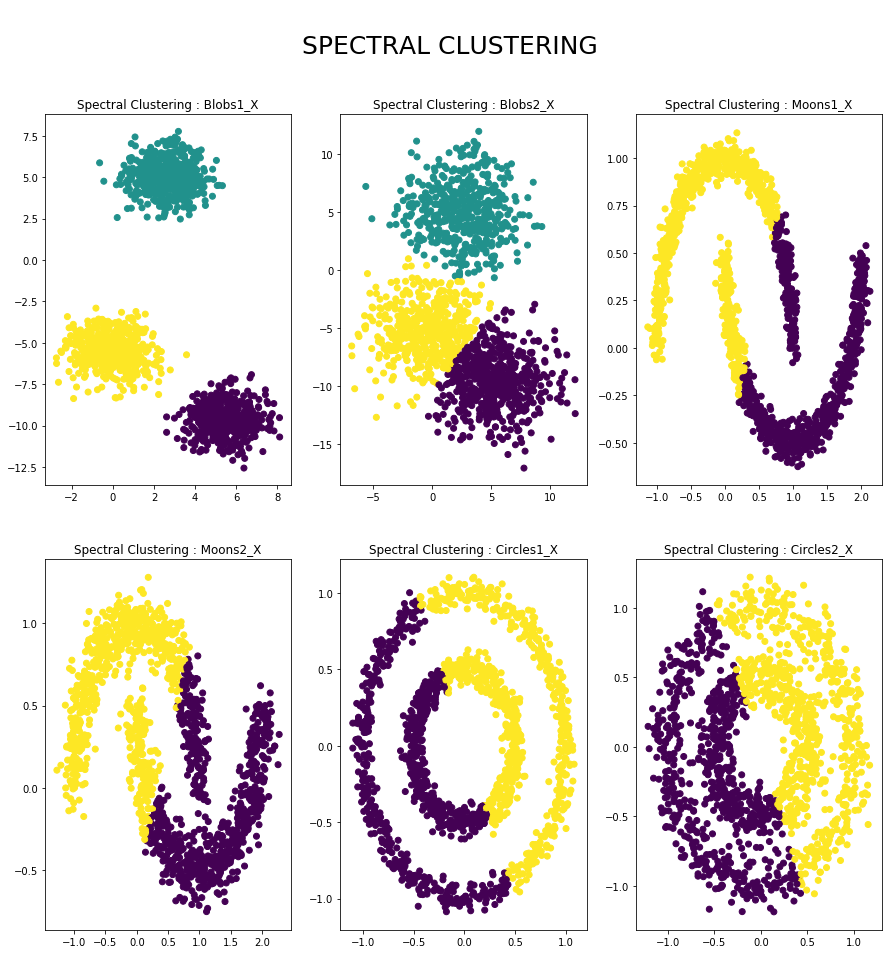

In [303]:
i = 1
f, axs = plt.subplots(2,3,figsize=(15,15))
f.suptitle('\nSPECTRAL CLUSTERING',fontsize=25)
algorithm = 'Spectral Clustering'
ds_pred = {}


cluster_algo = SpectralClustering(random_state=random_state,n_clusters= 3)
data = Blobs1_X
data_name = 'Blobs1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,0].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,0].title.set_text(algorithm+' : '+data_name)
i+=1

cluster_algo = SpectralClustering(random_state=random_state,n_clusters= 3)
data = Blobs2_X
data_name = 'Blobs2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,1].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,1].title.set_text(algorithm+' : '+data_name)
i+=1


cluster_algo = SpectralClustering(random_state=random_state,n_clusters= 2)
data = Moons1_X
data_name = 'Moons1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,2].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,2].title.set_text(algorithm+' : '+data_name)
i+=1


cluster_algo = SpectralClustering(random_state=random_state,n_clusters= 2)
data = Moons2_X
data_name = 'Moons2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,0].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[1,0].title.set_text(algorithm+' : '+data_name)
i+=1


cluster_algo = SpectralClustering(random_state=random_state,n_clusters= 2)
data = Circles1_X
data_name = 'Circles1_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,1].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[1,1].title.set_text(algorithm+' : '+data_name)
i+=1



cluster_algo = SpectralClustering(random_state=random_state,n_clusters= 2)
data = Circles2_X
data_name = 'Circles2_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,2].scatter(data[:, 0], data[:, 1], c=y_pred) 
axs[1,2].title.set_text(algorithm+' : '+data_name)
i+=1


d. For each of the datasets, compute Rand-Index value between the true labels and cluster memberships computed using Spectral clustering algorithm. Rank the datasets in decreasing order of Rand-Index scores.

In [304]:
rand_indexes = {}
rand_indexes['Blobs1_X'] = rand_index(Blobs1_y,ds_pred['Blobs1_X'])
rand_indexes['Blobs2_X'] = rand_index(Blobs2_y,ds_pred['Blobs2_X'])
rand_indexes['Moons1_X'] = rand_index(Moons1_y,ds_pred['Moons1_X'])
rand_indexes['Moons2_X'] = rand_index(Moons2_y,ds_pred['Moons2_X'])
rand_indexes['Circles1_X'] = rand_index(Circles1_y,ds_pred['Circles1_X'])
rand_indexes['Circles2_X'] = rand_index(Circles2_y,ds_pred['Circles2_X'])



print('\n----------------------------------\nRanked Indices : \n----------------------------------\n')
sorted_rand_idx = sorted(rand_indexes.items(), key = lambda x : x[1],reverse=True)
for d,ri in sorted_rand_idx:
      print(f"{d:<15}{ri:10}")


----------------------------------
Ranked Indices : 
----------------------------------

Blobs1_X       0.99911140760507
Blobs2_X       0.919189682010229
Moons2_X       0.6448441183010896
Moons1_X       0.6441263064265066
Circles2_X     0.4997553924838781
Circles1_X     0.49966733377807426


e. Are the rankings in (c) consistent with your observations in (d)? If not, explain the reason why your rankings were inconsistent.

#### Ans e

The rankings are as expected and observed from the plots

### 7. Clustering Tendency

a. Without using any metrics, for all the datasets (INCLUDING Rand) provided in the practice session, list the datasets that exhibit good clustering tendency. Support your answer by explaining your rationale.

#### Ans a
Blobs 1 , Moons1 will show good clustering tendency

Reason : This is because of high cohesion and good separation.

b. Without using any metrics, for all the datasets (INCLUDING Rand) provided in the practice session, list the datasets that do NOT exhibit good clustering tendency. Support your answer by explaining your rationale.

#### Ans b

Blobs 2 , Moons 2 , Circles 1 and Circles 2 do not seem to have good clustering tendency owing to less distinction of points in these clusters 

c. Compute Hopkins Statistic statistic for all the datasets and rank them based on decreasing order of this metric.

In [305]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    n = X.shape[0] #rows
    d = X.shape[1] #cols
    p = int(0.1 * n) #considering 10% of points
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n), p) 
 
    uj = []
    wj = []
    for j in range(0, p):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        uj.append(u_dist[0][1]) #distances to nearest neighbors in random data
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wj.append(w_dist[0][1]) #distances to nearest neighbors in real data
 
    H = sum(uj) / (sum(uj) + sum(wj))
    if isnan(H):
        H = 0
 
    return H

In [306]:
hopkin_stats = {}
hopkin_stats['Blobs1_X'] = hopkins(Blobs1_X)
hopkin_stats['Blobs2_X'] = hopkins(Blobs2_X)
hopkin_stats['Moons1_X'] = hopkins(Moons1_X)
hopkin_stats['Moons2_X'] = hopkins(Moons2_X)
hopkin_stats['Circles1_X'] = hopkins(Circles1_X)
hopkin_stats['Circles2_X'] = hopkins(Circles2_X)


print('\n----------------------------------\nRanked Hopkins : \n----------------------------------\n')
sorted_rand_idx = sorted(hopkin_stats.items(), key = lambda x : x[1],reverse=True)
for d,ri in sorted_rand_idx:
      print(f"{d:<15}{ri:10}")


----------------------------------
Ranked Hopkins : 
----------------------------------

Blobs1_X       0.9326221531728976
Moons1_X       0.9205804020215388
Moons2_X       0.8757634929509164
Blobs2_X       0.8487180792383074
Circles1_X     0.8312769310274778
Circles2_X     0.786535786353207


d. Are your answers for (a) and (b) consistent with that of (c)? If not, explain the reason for this inconsistency.

Yes, the rankings are almost consistent , other than visual inspection error for one case where the hopkins
stastic is negibly higher.

e. Run all the above clustering algorithms (KMeans, GMM, Agglomerative (single, max, average), DBSCAN, Spectral), using n_clusters = 3, on Rand dataset and visualize the clusters. Explain the reason for the shapes of clusters dervied using each clustering approach.

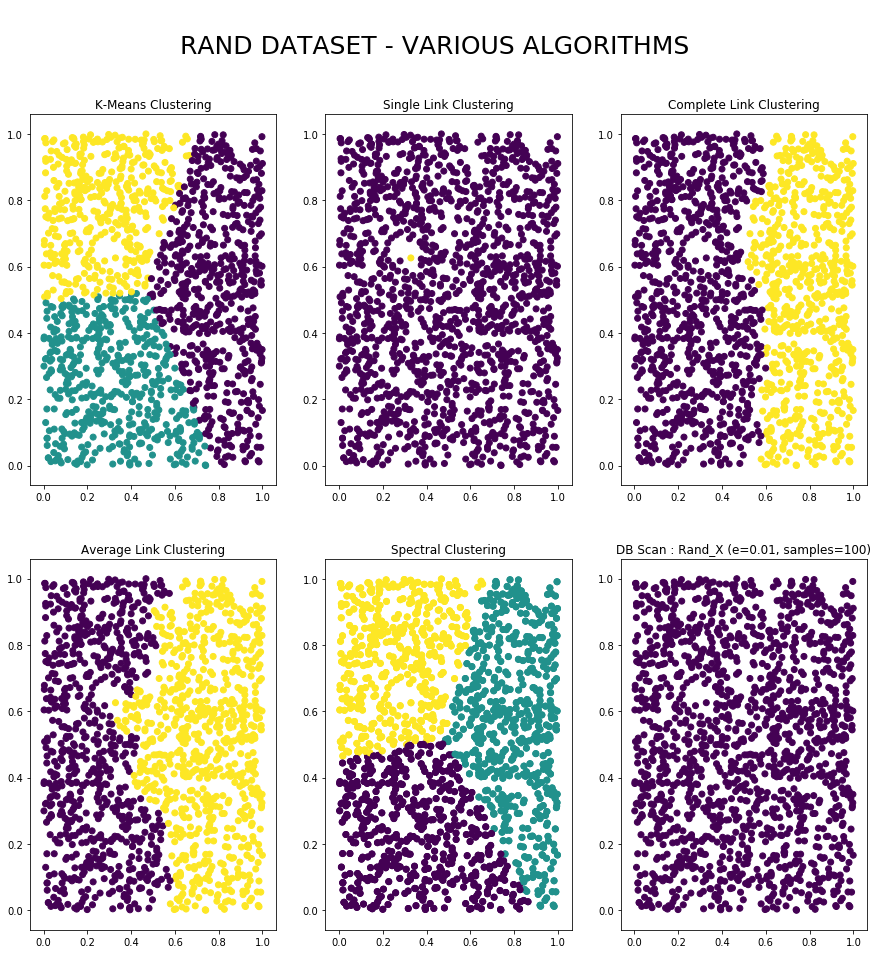

In [307]:
i = 1
f, axs = plt.subplots(2,3,figsize=(15,15))
f.suptitle('\nRAND DATASET - VARIOUS ALGORITHMS',fontsize=25)

data = Rand_X
ds_pred = {}


algorithm = 'K-Means Clustering'
cluster_algo = KMeans(n_clusters= 3, random_state=random_state)
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,0].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,0].title.set_text(algorithm)


algorithm = 'Single Link Clustering'
cluster_algo = AgglomerativeClustering(linkage="single",n_clusters= 2)
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,1].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,1].title.set_text(algorithm)

algorithm = 'Complete Link Clustering'
cluster_algo = AgglomerativeClustering(linkage="complete",n_clusters= 2)
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[0,2].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[0,2].title.set_text(algorithm)


algorithm = 'Average Link Clustering'
cluster_algo = AgglomerativeClustering(linkage="average",n_clusters= 2)
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,0].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[1,0].title.set_text(algorithm)


algorithm = 'Spectral Clustering'
cluster_algo = SpectralClustering(random_state=random_state,n_clusters= 3)
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,1].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[1,1].title.set_text(algorithm)


algorithm = 'Spectral Clustering'
cluster_algo = SpectralClustering(random_state=random_state,n_clusters= 3)
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,1].scatter(data[:, 0], data[:, 1], c=y_pred)   
axs[1,1].title.set_text(algorithm)


algorithm = 'DB Scan'  # Even very low values of epsilon , and very high values of min_samples 
                       # dont result in any clustering
eps=0.01
min_samples=100
cluster_algo = DBSCAN(eps=eps, min_samples=min_samples)
data = Rand_X
data_name = 'Rand_X'bb
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred
axs[1,2].scatter(data[:, 0], data[:, 1], c=y_pred) 
axs[1,2].title.set_text(algorithm+' : '+data_name+' (e={}, samples={})'.format(eps,min_samples))



#### Ans e

KMeans : Due to equal allocation of number of poins to three centroids , the data is almost equally divided into 
   3 clusters

DBScan : Since the density is uniform all across , it is difficult to find any clusters

Spectral : Since the affininty matrices will be exactly same for all the clusters, the data got divided into 
  consistrent regions equal to number of clusters

Single Links : Since the minimum distance is always same between points randmply distributed , no clusters recovered

Complete Link : Farthest points used for distance leading to more points being clustered together

Average Link : Average Link case represent better version than extremes of Max Link and Single link , and thus leads to somewhat uniform ditribution of points across clusters.



### 8. Real-world dataset

We will use the same breast cancer dataset we used for Classificatione exercise here.

In [225]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

The features are:

In [209]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Class labels are:

In [210]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Create dataset for classification

In [211]:
Cancer_X = cancer.data
Cancer_y = cancer.target

Size of Cancer_X and Cancer_y

In [212]:
Cancer_X.shape

(569, 30)

In [213]:
Cancer_y.shape

(569,)

a. Compute SSE for k = range(2,20), i.e, for k=2,3,4,...,20

In [229]:
score = np.zeros(21);
for i in range(2,21):
    kmeans = KMeans(n_clusters=i, random_state=random_state);
    kmeans.fit_predict(Cancer_X)
    score[i] = -kmeans.score(Cancer_X)
    print ("SSE for k=",i,":", round(score[i],2))

SSE for k= 2 : 77943099.88
SSE for k= 3 : 47285926.9
SSE for k= 4 : 29226541.65
SSE for k= 5 : 20539877.62
SSE for k= 6 : 16558716.7
SSE for k= 7 : 13249736.07
SSE for k= 8 : 11183535.78
SSE for k= 9 : 9609383.58
SSE for k= 10 : 8487166.05
SSE for k= 11 : 7613587.21
SSE for k= 12 : 6784588.86
SSE for k= 13 : 6157087.42
SSE for k= 14 : 5708365.13
SSE for k= 15 : 5286031.4
SSE for k= 16 : 4848940.46
SSE for k= 17 : 4398276.58
SSE for k= 18 : 4009831.04
SSE for k= 19 : 3738118.1
SSE for k= 20 : 3578729.29


b. Plot SSE values for k = range(2,40), i.e, for k=2,3,4,...,40

Text(0.5, 1.0, 'SSE for different values of k')

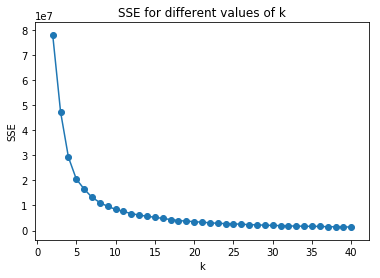

In [236]:
score = np.zeros(41);
for i in range(2,41):
    kmeans = KMeans(n_clusters=i, random_state=random_state);
    kmeans.fit_predict(Cancer_X)
    score[i] = -kmeans.score(Cancer_X)
plt.plot(range(2,41),score[2:41])
plt.scatter(range(2,41),score[2:41])
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE for different values of k')

c. Using this plot, determine the 'k' that you will use to do K-Means clustering.

#### Answer :
Since the bend is at k = 5, I will use five clusters for this dataset. 
My second choice would be use 4 clusters , but 5 is the real 'elbow'.

d. Using the 'k' you chose in (c), compute k-Means clustering.

Text(0.5, 1.0, 'K-Means : Cancer_X')

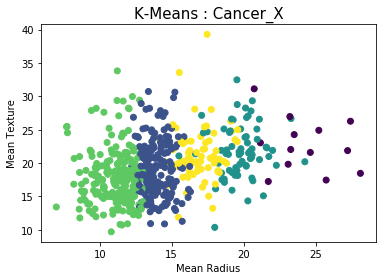

In [243]:
cluster_algo = KMeans(n_clusters= 5, random_state=random_state)
data = Cancer_X
data_name = 'Cancer_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred

#Attempting the cluster vizualiation using only first two features of the dataset
plt.scatter(data[:, 0], data[:, 1], c=y_pred) 
plt.xlabel('mean radius'.title())
plt.ylabel('mean texture'.title())
plt.title('K-Means : '+data_name,fontsize= 15)

e. Plot the silhouette values for points in each cluster (using the silhouette() function provided in the practice notebook). .

In [244]:
def silhouette(X,labels):
    n_clusters = np.size(np.unique(labels));
    sample_silhouette_values = silhouette_samples(X, labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        #Compute the new y_lower for next cluster
        y_lower = y_upper + 10  # 10 for the 0 samples
    plt.title("Silhouette plot for the various clusters.")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

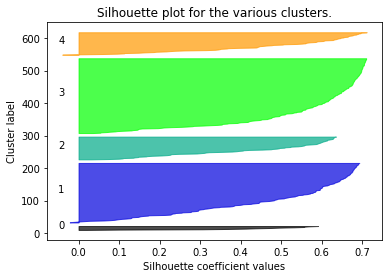

In [246]:
silhouette(Cancer_X, y_pred)

f. Comment on the quality of the clusters discovered using k-Means. Which of the clusters would you treat as good clusters and which clusters do you treat as not-so-good clusters?

The clusters recovered are fairly good given more than 68% silhoutte coefficeints for some of the clusters.

Good Clusters : Cluster 1 , 3 ,4
Not so good Clusters : 0,2

g. Compute the Rand Index of the k-means clusters with respect to the true labels. Comment on the quality of the clustering based on the Rand-Index score.

In [247]:
rand_index(Cancer_y, y_pred)

0.6625473402807001

The clusters are decently better than random case. Anything more than 50% is considered better than random clusterings. 68% is middle ground between random and really good clustering.

h. To use DBSCAN to find clusters in this data, one needs to determine eps and min_samples. To do this, consider the range of values eps = 50, 100, 150, 200, 250, 300, 400, 500 and min_samples = 10, 15, 20, 25, 30. 

For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of clusters obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of clusters, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

max(y_pred)+1

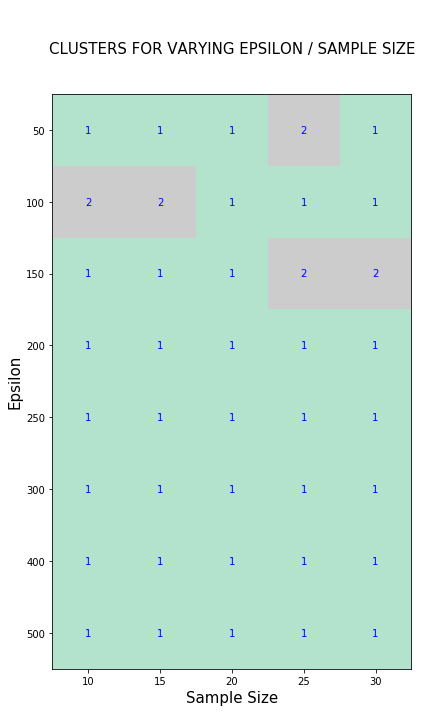

In [284]:
epsilons = [50, 100, 150, 200, 250, 300, 400, 500]
min_samples = [10, 15, 20, 25, 30]
num_clus_mtrx = []
data = Cancer_X
data_name = 'Cancer_X'
for epsilon in epsilons:
    eps_clus_size=[]
    for sample in min_samples:
        cluster_algo = DBSCAN(eps=epsilon, min_samples=sample) 
        y_pred = cluster_algo.fit_predict(data)
        ds_pred[data_name] = y_pred
        n_eps_clus = max(y_pred)+1
        eps_clus_size.append(n_eps_clus)
    num_clus_mtrx.append(eps_clus_size)
num_clus_mtrx = np.array(num_clus_mtrx)



#Plot the matrix
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(num_clus_mtrx,cmap='Pastel2')
ax.set_xticks(np.arange(len(min_samples)))
ax.set_yticks(np.arange(len(epsilons)))
ax.set_xticklabels(min_samples)
ax.set_yticklabels(epsilons)



# Loop over data dimensions and create text annotations.
for i in range(len(epsilons)):
    for j in range(len(min_samples)):
        text = ax.text(j, i, num_clus_mtrx[i, j],
                       ha="center", va="center", color="b")

        
ax.set_title("\n\nCLUSTERS FOR VARYING EPSILON / SAMPLE SIZE\n\n", fontsize=15)
ax.set_xlabel('Sample Size' , fontsize = 15)
ax.set_ylabel('Epsilon' , fontsize = 15)
fig.tight_layout()
plt.show()
    
    
    
    #plt.scatter(data[:, 0], data[:, 1], c=y_pred)   
    #axs[1,0].title.set_text(algorithm+' : '+data_name+' (e={}, samples={})'.format(eps,min_samples))

i. For these range of eps and min_samples values, compute an 8x5 matrix (with rows as eps values and cols as min_samples) to show the number of noise points obtained at each of these parameters. Visualize this matrix using imshow() in matplotlib.

Hint: To compute the number of noise points, you may use:

y_pred = dbscan.fit_predict(Cancer_X)

sum(y_pred==-1)

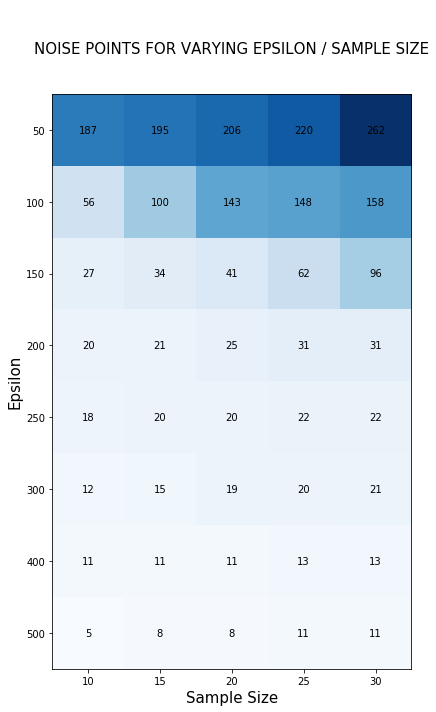

In [283]:
epsilons = [50, 100, 150, 200, 250, 300, 400, 500]
min_samples = [10, 15, 20, 25, 30]
num_clus_mtrx = []
data = Cancer_X
data_name = 'Cancer_X'
for epsilon in epsilons:
    eps_clus_size=[]
    for sample in min_samples:
        cluster_algo = DBSCAN(eps=epsilon, min_samples=sample) 
        y_pred = cluster_algo.fit_predict(data)
        ds_pred[data_name] = y_pred
        n_eps_clus = sum(y_pred==-1)
        eps_clus_size.append(n_eps_clus)
    num_clus_mtrx.append(eps_clus_size)
num_clus_mtrx = np.array(num_clus_mtrx)



#Plot the matrix
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(num_clus_mtrx,cmap='Blues')
ax.set_xticks(np.arange(len(min_samples)))
ax.set_yticks(np.arange(len(epsilons)))
ax.set_xticklabels(min_samples)
ax.set_yticklabels(epsilons)



# Loop over data dimensions and create text annotations.
for i in range(len(epsilons)):
    for j in range(len(min_samples)):
        text = ax.text(j, i, num_clus_mtrx[i, j],
                       ha="center", va="center", color="black")

        
ax.set_title("\n\nNOISE POINTS FOR VARYING EPSILON / SAMPLE SIZE\n\n", fontsize=15)
ax.set_xlabel('Sample Size' , fontsize = 15)
ax.set_ylabel('Epsilon' , fontsize = 15)
fig.tight_layout()
plt.show()
    
    
    
    #plt.scatter(data[:, 0], data[:, 1], c=y_pred)   
    #axs[1,0].title.set_text(algorithm+' : '+data_name+' (e={}, samples={})'.format(eps,min_samples))

j. What observations can you make about the clustering structure in this data, based on the matrices you generated for (g) and (h)?

We can observe that we have to raise atleast one of the parameters to really high values in order to get more clusters

k. Select the parameters for eps, min_samples based on your answers for (g), (h) and (i). Compute cluster assigments using DBSCAN. Compute RandIndex of the cluster assignments with respect to the true labels.

In [287]:
eps = 100
min_samples = 10

cluster_algo = DBSCAN(eps=eps, min_samples=min_samples)
data = Cancer_X
data_name = 'Cancer_X'
y_pred = cluster_algo.fit_predict(data)
ds_pred[data_name] = y_pred

rand_index_dbscan(Cancer_y, y_pred)


0.6680115844451595

l. Compare RandIndex from (g) with that of (k) and determine which algorithm performed best? Based on this, comment on how the data/clusters may be distributed in $R^d$.

Both algorithms perfomred almost equally good based on rand index values.